In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("train.csv")
df.head()
print(df.PassengerId.isnull().sum())


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
print(
    df.Survived.isnull().sum(),
    df.Sex.isnull().sum()
    
)


0 0


<Axes: xlabel='Sex', ylabel='count'>

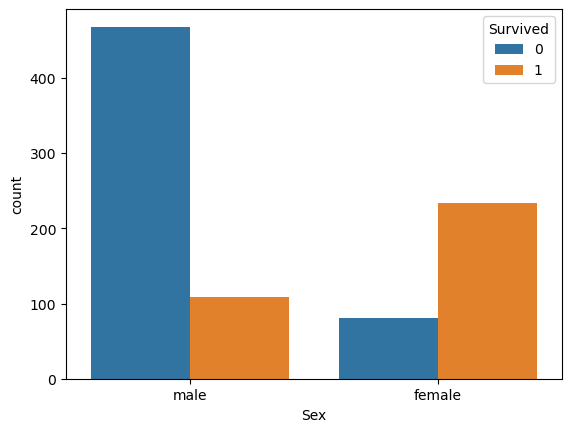

In [34]:
sns.countplot(x = 'Sex',data = df,hue = 'Survived')

Text(0.5, 1.0, 'HeatMap')

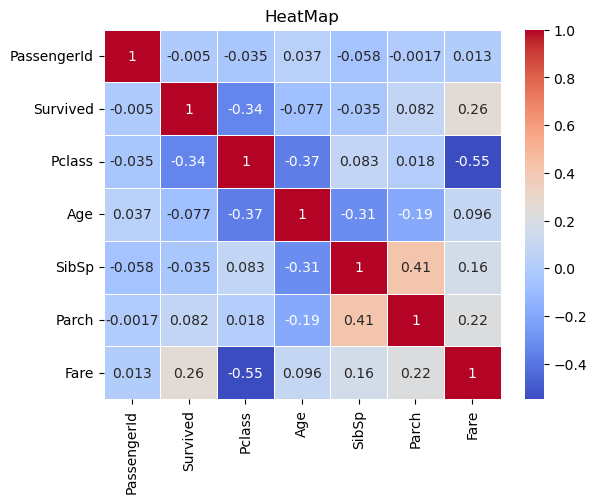

In [35]:
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidth = 0.5)
plt.title("HeatMap")

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df['Embarked'].unique()
df['Embarked'].isnull().sum()
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [40]:
df['Embarked'].isnull().sum()

np.int64(0)

In [41]:
df = df.replace(
    {'Sex':
    {
        'male':1,
        'female':2
    },
    'Embarked':
    {
        'S':1,
        'Q':2,
        'C':3

    }



})
df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_72524\2114894655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,3
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [42]:
df['Age'].isnull().sum()
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [43]:
model = LogisticRegression()
X = df[['Sex','Age','Embarked']]
Y = df.Survived
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.3 , random_state = 45 )

In [44]:
model.fit(X_train,Y_train)

LogisticRegression()

In [45]:
model.coef_


array([[ 2.27051394, -0.00958074,  0.32444443]])

In [46]:
model.intercept_

array([-3.7213606])

In [47]:
Y_pred = model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8208955223880597

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10)
cross_val_score(model, X, Y, cv=stratified_kfold,scoring = 'accuracy')
#mitigated the chance of class imbalance


array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [50]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [51]:
Y_pred2 = model2.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8208955223880597

In [52]:
stra = StratifiedKFold(n_splits = 10)
cross_val_score(model2,X,Y, cv = stra)

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler fitted on the training data)
X_test_scaled = scaler.transform(X_test)

In [54]:
model_l2 = LogisticRegression(penalty='elasticnet', C=.1, l1_ratio = 0.3 , solver='saga',class_weight = 'balanced', max_iter=2000)
model_l2.fit(X_train_scaled,Y_train)
Y_pred2 = model_l2.predict(X_test_scaled)
accuracy_score(Y_test,Y_pred2)

0.8208955223880597

In [55]:
stra = StratifiedKFold(n_splits = 10)
cross_val_score(model_l2,X,Y, cv = stra)

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
prec = precision_score(Y_test,Y_pred2)
rec = recall_score(Y_test,Y_pred2)
f1 = f1_score(Y_test,Y_pred2)
roc = roc_auc_score(Y_test,Y_pred2)

print(prec,rec,f1,roc)


0.723404255319149 0.7555555555555555 0.7391304347826086 0.8047440699126093


In [25]:
from sklearn.model_selection import GridSearchCV



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'solver': ['saga', 'liblinear'],  # Solver types
    'max_iter': [100, 200, 500,1000]  # Number of iterations
}

# Initialize the Logistic Regression model
model = LogisticRegression(class_weight='balanced')

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best model accuracy: {accuracy:.4f}")


NameError: name 'StandardScaler' is not defined